<h1 style="color:red;">01</h1>

<h2 style="color:blue;">01-01 Readings and Plotting Stock Data</h2>

### read csv, row selection

In [ ]:
import pandas as pd

def test_run():
    df = pd.read_csv("data/AAPL.csv")
    print(df)        #print entire dataframe
    print(df.head()) #print just the top 5 lines (add index from 0)
    print(df[10:21]) #row selection: between index 10 and 20
    

if __name__ == " __main__":
    test_run()

In [ ]:
import pandas as pd

def get_max_close(symbol):
'''Return the maximum closing value for stock indictated by symbol'''
    df = pd.read_csv(data/{}.format(symbol))
    return df['Close'].max()

def test_run():
    for symbol in ['AAPL', 'IBM']:
        print("Max Closing")
        print(symbol, get_max_close(symbol))

if __name__ == " __main__":
    test_run()

In [ ]:

def get_mean_volume(symbol):
'''Return the mean volume for stock indicated by symbol'''
    df = pd.read_csv(data/{}.format(symbol))
    return df['Volume'].min()

def test_run():
    for symbol in ['AAPL', 'IBM']:
        print("Min Volume")
        print(symbol, get_mean_volume(symbol))

### Plotting stock price data

print adjusted close prices for AAPL

In [5]:
import pandas as pd

def test_run():
    df = pd.read_csv("data/AAPL.csv")
    print(df['Adj Close'])
    df['Adj Close'].plot()
    plt.show() # must be called to show plots

if __name__ == " __main__":
    test_run()

plot high prices for IBM

In [4]:
def test_run():
    df = pd.read_csv('data/IMB.csv')
    print(df['High'])
    df['High'].plot()
    plt().show

plot two columns

In [ ]:
def test_run():
    df = pd.read_csv('data/AAPL.csv')
    df[['Close', 'Adj Close']].plot()   #double the brackets
    plt.show()  
#the graph will contain two lines, one for each

<h2 style="color:blue;">01-02 Working with multiple stocks
</h2>

### buiding a data frame

join dataframes

In [16]:
import pandas as pd

def test_run():
    
    # Define date range
    start_date = '2010-01-22'
    end_date = '2010-01-26'
    dates = pd.date_range(start_date, end_date)
    print(dates)
    print(dates[0])

    # Create an empty dataframe
    df1 = pd.DataFrame(index = dates)

    # Read SPY data into temporary dataframe 
        # use the "Date" column as the index, each row will be indexed by its date, rather than rows being numbered 0,1,2,3
        # With parse_dates=True, Pandas automatically tries to convert date-looking strings into datetime objects (datetime64) which can be filtered by date range, otherwise it's pure text
        # usecols lets you pick only the ones you want.
        # With na_values=['nan'], any literal "nan" string in your CSV will be converted to an actual NaN (numpy.nan) in the DataFrame.
    dfSPY = pd.read_csv('data/SPY.csv', index_col = "Date", parse_dates = True, 
                        usecols = ['Date', 'Adj Close'], na_values = ['nan'])
    
    # Rename 'Adj Close' column to 'SPY' to prevent clash (because each column must be unique)
    dfSPY = dfSPY.rename(columns={'Adj Close':'SPY'})
    
    # Join the two dataframs using : Dataframe.join(), with how = 'inner' (defaul: how = left)
    df1 = df1.join(dfSPY, how = 'inner')  

    # Read in more stocks
    symbols = ['GOOG', 'IBM', 'GLD']
    for symbol in symbols:
        df_temp = pd.read_csv('data/{}.csv'.format(symbol), index_col = 'Date', parse_dates = True, usecols = ['Date', 'Adj Close'], na_values = ['nan'])
        df_temp = df_temp.rename(columns = {'Adj Close' : symbol}) # rename to prevent crash
        df1 = df1.join(df_temp) #use the default how = 'left'
    

test_run()

DatetimeIndex(['2010-01-22', '2010-01-23', '2010-01-24', '2010-01-25',
               '2010-01-26'],
              dtype='datetime64[ns]', freq='D')
2010-01-22 00:00:00


types of "join:
    1. Inner Join (default): pd.merge(df1, df2, on="key", how="inner")
        Keeps only rows with matching keys in both DataFrames.
        Drops rows that don’t match.
    2. Left Join: pd.merge(df1, df2, on="key", how="left")
        Keeps all rows from the left DataFrame (df1).
        If no match in df2, fills with NaN.
    3. Right Join: pd.merge(df1, df2, on="key", how="right")
        Keeps all rows from the right DataFrame (df2).
        If no match in df1, fills with NaN.
    4. Outer Join (a.k.a. Full Join): pd.merge(df1, df2, on="key", how="outer")
        Keeps all rows from both DataFrames.
        Missing matches are filled with NaN.
    5. Special: Cross Join (Cartesian Product): pd.merge(df1, df2, how="cross")
        Every row in df1 is paired with every row in df2.
        Useful for combinations, not common in finance/data analysis.
    

In [ ]:
# Drop NaN value
df1 = df1.dropna()

### Utility functions for reading data

In [ ]:
import os
import pandas as pd

def symbol_to_path(symbol, base_dir = 'data'):
    '''Return CSV file path given ticker symbol'''
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def get_data(symbols, dates):
    '''Read stock data(Adj Close) for given symbols from CSV files'''
    df = pd.DataFrame(index = dates)
    
    if 'SPY' not in symbols:
        symbols.insert(0, "SPY")

    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col = 'Date', parse_dates = True, usecols = ['Date', 'Adj Close'], na_values = ['nan'])
        df_temp = df_temp.rename(columns = {'Adj Close' : symbol}) 
        df = df.join(df_temp)
        if symbol == 'SPY':    #drop dates SPY did not trade (SPY is used as reference)
            df = df.dropna(subset = ['SPY'])
            
return df

### Slicing dataframes

Eg: df2 = df1[start_date : end_date, ['GOOG', 'GLD']]

In [ ]:
def test_run():

    # Define a date range
    dates = pd.date_range('2010-01-01', '2010-12-31') # the year of 2010

    # Choose stock symbols to read
    symbols = ['GOOG', 'IBM', 'GLD'] #SPY will be added in get_data(), treated as a reference symbol

    # Get stock data
    df = get_data(symbols, dates)

    # Slice by row range(dates) using DataFrame.ix[] selector 
    print(df.ix['2010-01-01':'2010-01-31']) # old pandas expression
    df.loc["2010-01-05"] # By label (.loc)
    df.iloc[1]   # By position (.iloc), [1]: second row
    df.loc["2010-01-04":"2010-01-05"]   # label slice
    df.iloc[0:2]                        # position slice
    

     # Slice by column(symbols)
    print(df['GOOG'])
    print(df[['IBM', 'GLD']]) # alist of labels select multiple columns, double brackets: The outer brackets tell Pandas you want to select columns. The inner list ['IBM', 'GLD'] specifies multiple column labels.

    # Slice by row and column: .loc[row_labels, col_labels] → by names (dates, column names); .iloc[row_index, col_index] → by numeric positions.
    print(df.ix['2010-01-01':'2010-01-31', ['SPY', 'IBM']]
          
    df.loc["2010-01-05", "IBM"]
    df.loc["2010-01-04":"2010-01-05", ["IBM", "GLD"]] 

    df.iloc[1, 0]    
    df.iloc[0:2, 0:2]
    

### normalize

In [ ]:
# normalize price data so that all prices start at 1.0
df1 = df1/df1[0] # old way
df1 = df1 / df1.iloc[0] # Each column gets divided by its own first-day value.

#same as:
for date in df1.index:
    for s in symbols:
        df1.loc[date, s] = df1.loc[date, s] / df1.loc[df1.index[0], s]
    

### Plot

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def plot_data(df, title="Stock Prices"):
    '''plot stock prices'''
    ax = df.plot(title=, fontsize=2)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    plt.show() # must be called to to show plots in some envs

def plot_selected(df, columns, start_index, end_index):
    ''' Plot the desired columns over index values in teh given range'''
    plot_data(df.ix[start_index:end_index, columns]) #old
    plot_data(df.loc[start_index:end_index, columns], title='Selected data') #new
    
def normalize_data(df):
    '''normalize stock prices using the first row of the dataframe'''
    return df/df.iloc[0] #or df/df.ix[0,:] # All the stock will begin with $1.0


### Working with multiple stocks summary

To read multiple stocks into a single dataframe, you need to:
    Specify a set of dates using pandas.date_range
    Create an empty dataframe with dates as index 
        This helps align stock data and orders it by trading date
    Read in a reference stock (here SPY) and drop non-trading days using pandas.DataFrame.dropna
    Incrementally join dataframes using pandas.DataFrame.join

Once you have multiple stocks, you can:
    Select a subset of stocks by ticker symbols
    Slice by row (dates) and column (symbols)
    Plot multiple stocks at once (still using pandas.DataFrame.plot)
    Carry out arithmetic operations across stocks, e.g. normalize by the first day's price



<h2 style="color:blue;">01-05 Incomplete Data
</h2>

Missing data: fill forward first, then fill backwards

Pandas: data.fillna(method='ffill'/'bfill', inplace='TRUE')

<h2 style="color:blue;">01-06 Histograms and scatter plots
</h2>

In [ ]:
"""Plot a Histogram"""

import pandas as pd
import matplotlib.pyplot as plt

from util import get_data, plot_data

def compute_daily_returns(df):
	# Compute and return the daily return values
	daily_returns = df.copy()
	daily_returns[1:] = (df[1:] / df[:-1].values) - 1
	daily_returns.iloc[0, :] = 0 # set daily returns for row 0 to 0
	return daily_returns

def test_run():
	# Read data
	dates = pd.date_range('2009-01-01', '2012-12-31')
	symbols = ['SPY']
	df = get_data(symbols, dates)
	plot_data(df)
	
	# Compute daily returns
	daily_returns = compute_daily_returns(df)
	plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")
	
	# Plot a histogram
	daily_returns.hist()  # default number of bins, 10
	daily_returns.hist(bins=20)  # changing no. of bins to 20
	plt.show()

'''Computing Histogram Statistics'''

    # Get mean and standard deviation
	mean = daily_returns['SPY'].mean()
	print ("mean=", mean)
	std = daily_returns['SPY'].std()
	print ("std=", std)
	
	plt.axvline(mean, color='w', linestyle='dashed', linewidth=2)
	plt.axvline(std, color='r', linestyle='dashed', linewidth=2)
	plt.axvline(-std, color='r', linestyle='dashed', linewidth=2)
	plt.show()
	
	# Compute kurtosis
	print (daily_returns.kurtosis())

	
if __name__ == "__main__":
	test_run()




📌 Vertical & Horizontal Lines

plt.axvline(x, ...) → Vertical line at x

plt.axhline(y, ...) → Horizontal line at y

plt.axline((x1, y1), slope=...) → Infinite line through a point with a given slope

📌 Spans (Shaded Regions)

plt.axvspan(xmin, xmax, ...) → Vertical shaded band between xmin and xmax

plt.axhspan(ymin, ymax, ...) → Horizontal shaded band between ymin and ymax

📌 Regular Lines

plt.plot([x1, x2], [y1, y2], ...) → Draws a line segment between two points

plt.vlines(x, ymin, ymax, ...) → Multiple vertical line segments

plt.hlines(y, xmin, xmax, ...) → Multiple horizontal line segments

In [ ]:
"""Plot Two Histograms together"""

import pandas as pd
import matplotlib.pyplot as plt

from util import get_data, plot_data

def compute_daily_returns(df):
	daily_returns = df.copy()
	daily_returns[1:] = (df[1:] / df[:-1].values) - 1
	daily_returns.ix[0, :] = 0 
	return daily_returns
	
def test_run():
	# Read data
	dates = pd.date_range('2009-01-01', '2012-12-31')
	symbols = ['SPY', 'XOM'] # two symbols
	df = get_data(symbols, dates)
	plot_data(df)
	
	""" Two separate histograms ==========="""
	# Compute daily returns
	daily_returns = compute_daily_returns(df)
	plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")
	
	# Plot a histogram
	daily_returns.hist(bins=20) 
	plt.show()

	""" Histograms on the same graph ======"""
	# Compute daily returns
	daily_returns = compute_daily_returns(df)
	
	# Compute and plot both histograms on the same chart
	daily_returns['SPY'].hist(bins=20, label="SPY")
	daily_returns['XOM'].hist(bins=20, label="XOM")
	plt.legend(loc='upper right')
	plt.show()
	
if __name__ == "__main__":
	test_run()

In [ ]:

"""Scatterplots : relationships""" 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from util import get_data, plot_data

def compute_daily_returns(df):
	"""Compute and return the daily return values."""
	daily_returns = df.copy()
	daily_returns[1:] = (df[1:] / df[:-1].values) - 1
	daily_returns.ix[0, :] = 0 # set daily returns for row 0 to 0
	return daily_returns
	
def test_run():
	# Read data
	dates = pd.date_range('2009-01-01', '2012-12-31')
	symbols = ['SPY', 'XOM', 'GLD']
	df = get_data(symbols, dates)
	
	# Compute daily returns
	daily_returns = compute_daily_returns(df)
	
	# Scatterplot SPY vs XOM
	daily_returns.plot(kind='scatter', x='SPY', y='XOM')
	beta_XOM, alpha_XOM= np.polyfit(daily_returns['SPY'], daily_returns['XOM'], 1)
	print ("beta_XOM= ", beta_XOM)
	print ("alpha_XOM=", alpha_XOM)
	plt.plot(daily_returns['SPY'], beta_XOM*daily_returns['SPY'] + alpha_XOM, '-',color='r')
	plt.show()
	
	# Scatterplot SPY vs GLD
	daily_returns.plot(kind='scatter', x='SPY', y='GLD')
	beta_GLD, alpha_GLD= np.polyfit(daily_returns['SPY'], daily_returns['GLD'], 1)
	print ("beta_GLD= ", beta_GLD)
	print ("alpha_GLD=", alpha_GLD)
	plt.plot(daily_returns['SPY'], beta_GLD*daily_returns['SPY'] + alpha_GLD, '-',color='r')
	plt.show()
	
	
if __name__ == "__main__":
	test_run()

<h2 style="color:blue;">01-07 Sharp Ratio and other statistics
</h2>

Sharpe ratio: a risk-adjusted performance measure 

It tells you how much excess return you’re getting for each unit of risk you take


Sharpe Ratio = (R_p - R_f)\sigma_p ; short cut: 

where:  
- R_p = average return of the portfolio (or asset)  
- R_f = risk-free rate(LIBOR, 3mo T-bill, 0%)
- sigma_p = standard deviation of portfolio returns





--Ex Ante (forward-looking) : uses expected returns and expected volatility

S = E(Rp - Rf)/std(Rp- Rf) --> short cut: S = E(Rp - Rf)/std(Rp) treat std(Tf) as a constant


--Ex Post (historical / realized) : uses sample averages and realized standard deviation:

In [ ]:
'''Daily portfolio values'''

start_val = 1000000
start_date = 2009-1-1
end_date = 2011-12-31
symbols = ['SPY', 'XOM', 'GOOG', 'GLD']
allocs = [0.4, 0.4, 0.1, 0.1]


normed = prices/prices[0]
alloced = normed * allocs
pos_vals = alloced * start_val
port_val = pos_vals.sum(axis=1)

# portfolio statistics
daily_rets = daily_rets[1:]  # the value of the daily return of first day is always zero
cum_ret = (port_val[-1]/port_val[0] - 1)
avg_daily_ret = daily_rets.mean()
std_daily_ret = daily_rets.std()

# sharp ratio
SR = sqrt(k) * mean(daily_rets - daily_rf) / std(daily_rets)

- SR can vary widely depending on how frequently you sample
- SR is an annual measure
- SR_annulized = K * SR, K = sqrt(#samples per year), daily K = sqrt(252), weekly = sqrt(52), monthly = sqrt(12)

Returns: If daily mean = μ, then annual mean ≈ K×𝜇 

Volatility: If daily std = σ, then annual std ≈ √K×𝜎 

When you take mean / std = Sharpe, the linear vs sqrt scaling leaves you with √K

<h2 style="color:blue;">01-08 Optimizers: Building a parameterized model
</h2>

what is an optimizer:
- find minimum values of functions
- build parameterized models based on data
- refine allocations to stocks in portfolios

How to use an optimizer:
- provide a function to minimize
- provide an initial guess
- call the optimizer

X = [2.], Y = [0.75]
X = [2.00000001], Y = [0.75000001]
X = [0.99999999], Y = [0.75000001]
X = [1.5], Y = [0.5]
X = [1.50000001], Y = [0.5]
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5
            Iterations: 2
            Function evaluations: 5
            Gradient evaluations: 2
Minima found at:
X = [1.5], Y = 0.5
X = [0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2
 2.3 2.4 2.5], Y = [1.5  1.31 1.14 0.99 0.86 0.75 0.66 0.59 0.54 0.51 0.5  0.51 0.54 0.59
 0.66 0.75 0.86 0.99 1.14 1.31 1.5 ]


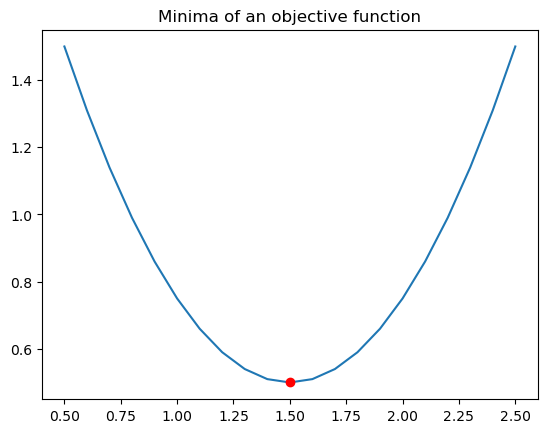

In [6]:
"""Minimize an objective function using SciPy."""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as spo

def f(X):
	"""Given a scalar X, return some value (a real number)."""
	Y = (X - 1.5)**2 + 0.5
	print ("X = {}, Y = {}".format(X, Y)) # for tracing
	return Y
	
def test_run():
	Xguess = 2.0

    #optimizer : minimize
	min_result = spo.minimize(f, Xguess, method='SLSQP', options={'disp': True})
    
	print ("Minima found at:")
	print ("X = {}, Y = {}".format(min_result.x, min_result.fun))
	
	# Plot function values, mark minima
	Xplot = np.linspace(0.5, 2.5, 21)
	Yplot = f(Xplot)
	plt.plot(Xplot, Yplot)
	plt.plot(min_result.x, min_result.fun, 'ro')
	plt.title("Minima of an objective function")
	plt.show()
	
if __name__ == "__main__":
	test_run()

from scipy.optimize import minimize

res = minimize(fun, x0, args=(), method=None, jac=None, hess=None,
               bounds=None, constraints=(), tol=None, options=None, callback=None)

- fun(x, *args): your objective; returns a scalar.

- x0: initial guess (1D array-like).

- method: algorithm (e.g., 'BFGS', 'L-BFGS-B', 'Nelder-Mead', 'Powell', 'SLSQP', 'TNC', 'trust-constr'…).

- jac: gradient function ∂f/∂x (optional but speeds/steadies many methods).

- bounds: variable bounds for methods that support them (e.g., L-BFGS-B, TNC, SLSQP).

- constraints: equality/inequality constraints (e.g., for SLSQP, trust-constr).

- options: dict like {'maxiter': 1000, 'disp': True, 'ftol': 1e-9}.


It returns an object of type OptimizeResult.
This is basically like a dictionary + attributes that hold all the information about the optimization run.
The most important fields:
- res.x → the solution (the parameters that minimize your function).
Example: for line fitting, it will be [slope, intercept].
- res.fun → the value of your objective function at the solution (the minimized error).
- res.success → Boolean: True if optimization converged successfully.
- res.message → String explaining the termination reason (why the optimizer stopped).
- res.nit → Number of iterations used.
- res.nfev → Number of function evaluations.
- res.jac → The gradient at the solution (if available).
- res.hess → Hessian (for certain methods).

plt.plot(min_result.x, min_result.fun, 'ro')
1. min_result
This object usually comes from an optimization function (e.g. scipy.optimize.minimize).
min_result.x → the x-coordinate(s) where the function attains its minimum.
min_result.fun → the corresponding y-value (the function value at that minimum).
So together, (min_result.x, min_result.fun) is the point of the minimum.

2. 'ro'
This is a format string that tells Matplotlib how to draw the point:
'r' → red color
'o' → circle marker
So 'ro' means: red circle marker.

In [ ]:
"""Fit a line to a given set of data point using optimization"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as spo

def error(line, data): # error function
	"""Compute error between given line model and observed data.
	
	Parameters:
    	line: tuple/list/array (C0, C1) where C0 is slope and C1 is Y-intercept
    	data: 2D array where each row is a point (x, y)
        
	Returns error as a single real value.	
    """
    
	# Metric: Sum of squared Y-axis differences
	err = np.sum((data[:,1] - (line[0] * data[:, 0] + line[1])) ** 2)
	return err	

def fit_line(data, error_func):
	"""Fit a line to given data, using a supplied error function.
	
	Parameters
	data: 2D array where each row is a point (X0, Y)
	error_func: function that computes the error between a line and observed data
	
	Returns line that minimizes the error function.
	"""
	# Generate initial guess for line model 
	l = np.float32([0, np.mean(data[:, 1])])  # slope = 0, intercept = mean(y values)
	
	# Plot initial guess (optional)
	x_ends = np.float32([-5, 5])
	plt.plot(x_ends, l[0] * x_ends + l[1], 'm--', linewidth=2.0, label = "Initial guess")
	
	# Call optimizer to minimize error function
	result = spo.minimize(error_func, l, args=(data,), method = 'SLSQP', options={'disp': True})
	return result.x
	
def test_run():
	# Define original line
	l_orig = np.float32([4, 2])
	print ("Original line: C0 = {}, C1 = {}".format(l_orig[0], l_orig[1]))
	Xorig = np.linspace(0, 10, 21)
	Yorig = l_orig[0] * Xorig + l_orig[1]
	plt.plot(Xorig, Yorig, 'b--', linewidth=2.0, label="Original line")
	
	# Generate noisy data points
	noise_sigma = 3.0
	noise = np.random.normal(0, noise_sigma, Yorig.shape)
	data = np.asarray([Xorig, Yorig + noise]).T
	plt.plot(data[:,0], data[:, 1], 'go', label="Data points")
	
	# Try to fit a line to this data
	l_fit = fit_line(data, error)
	print ("Fitted line: C0 = {}, C1 = {}".format(l_fit[0], l_fit[1]) )
	plt.plot(data[:, 0], l_fit[0] * data[:, 0] + l_fit[1], 'r--', linewidth=2.0, label = "Fitted Line")
	
	# Add a legend and show plot
	plt.legend(loc='upper right')
	plt.show()
	
	
if __name__ == "__main__":
	test_run()

np.random.normal(μ, σ, size) generates random samples from a normal distribution.
- Size = Yorig.shape (so the noise has the same length as your Y data).

data = np.asarray([Xorig, Yorig + noise]).T
- Yorig + noise → adds the random noise to your original y-values.
- [Xorig, Yorig + noise] → makes a 2-row array: first row = X, second row = Y+noise.
- .T → transposes it, so now each row = [x, noisy y].
- Final data shape = (N, 2), i.e. N rows, 2 columns.

plt.plot(data[:,0], data[:,1], 'go', label="Data points")
- 'go' = green circles (g = green, o = circle marker).


In [ ]:
"""Fit a line to a given set of data point using optimization: polynomial"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as spo

def error_poly(C, data): # error function
	# Metric: Sum of squared Y-axis differences
	err = np.sum((data[:,1] - np.polyval(C, data[:,0])) ** 2)
	return err	
	
def fit_poly(data, error_func, degree=3):
	# Generate initial guess for line model (all coeffs = 1)
    
	Cguess = np.poly1d(np.ones(degree + 1, dtype=np.float32))
	
	# Plot initial guess (optional)
	x = np.linspace(-5, 5, 21)
	plt.plot(x, np.polyval(Cguess, x), 'm--', linewidth=2.0, label = "Initial guess")
	
	# Call optimizer to minimize error function
	result = spo.minimize(error_func, Cguess, args=(data,), method = 'SLSQP', options={'disp': True})
	return np.poly1d(result.x) # convert optimal result into a poly1d object and return
	
def test_run():
	# Define original line

	
	# Generate noisy data points

	
	# Try to fit a line to this data

	
	# Add a legend and show plot


	
if __name__ == "__main__":
	test_run()

<h2 style="color:blue;">01-09 Minimizer: how to optimize a portfolio
</h2>

Can choose different strategies between the goals:
1. maxcumulative return
2. min std
3. max Sharp Ration
4. ...

Framing the problem:
1. provide a function to minimize : f(x) = ? (if we want a max sharp ratio, f = - SR)
2. provide an initial guess for X
3. call the optimizer

Ranges and constraints
1. Ranges: limits on values for X, only focus on each dimentions of X on [0, 1] (limits the search area significantly)
2. Constrains: (properties of X that must be True) sum of X must be 1(100%)

<h1 style="color:red;">03
</h1>

<h2 style="color:blue;"> How machine learning is used at a hedge fund
</h2>

Supervised Regression Learning

- Supervised: provide examples x,y...
- Regression: numerical prediction
- Learning: training with data


<h2 style="color:blue;">03-03 Assessing a Learning Algorithm
</h2>